In [ ]:
import argparse
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt





In [ ]:
def plot_macd_lags(df, lags=6, title="MACD0 … MACD5"):
    """
    Vẽ các cột MACD0 … MACD(lags-1) trong DataFrame `df`.
    Giả sử chúng đã tồn tại với tên 'MACD0', 'MACD1', …
    """
    plt.figure(figsize=(12, 4))

    for k in range(lags):
        plt.plot(df[f"MACD{k}"], label=f"MACD{k}")

    plt.title(title)
    plt.xlabel("Index / Time")
    plt.ylabel("MACD value")
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

In [32]:
from datetime import datetime, timedelta
from fmp_data import get_fmp_data, extract_features   # đổi lại tên module
# ----------------------------------------------------
# CÀI ĐẶT
# ----------------------------------------------------
symbol        = "NVDA"          # FMP dùng BTCUSD (chữ hoa) cho crypto
days_of_data  = 365 * 5           # 5 năm
current_date  = "2025-07-01 00:00:00"

# ----------------------------------------------------
# Bước 1: Tải dữ liệu
# ----------------------------------------------------
print("\nBước 1: Tải dữ liệu...")
end_date_dt   = datetime.strptime(current_date, "%Y-%m-%d %H:%M:%S")
start_date_dt = end_date_dt - timedelta(days=days_of_data)

# FMP API nhận chuỗi 'YYYY-MM-DD'
start_date = start_date_dt.strftime("%Y-%m-%d")
end_date   = end_date_dt.strftime("%Y-%m-%d")
print(f"Từ {start_date} → {end_date}")

hist_data = get_fmp_data(symbol, start_date=start_date, end_date=end_date)

if hist_data.empty:
    raise RuntimeError("Không thể lấy dữ liệu. Huấn luyện bị hủy.")
print(f"-> Tải thành công {len(hist_data)} phiên.")

# ----------------------------------------------------
# Bước 2: Trích xuất đặc trưng
# ----------------------------------------------------
print("\nBước 2: Trích xuất đặc trưng...")
features_df = extract_features(hist_data)
if features_df.empty:
    raise RuntimeError("Không có đủ dữ liệu sau khi trích xuất đặc trưng. "
                       "Vui lòng tăng `days_of_data`.")
print(f"-> Trích xuất thành công {features_df.shape[1]} đặc trưng cho {len(features_df)} phiên.")



Bước 1: Tải dữ liệu...
Từ 2020-07-02 → 2025-07-01
-> Tải thành công 1826 phiên.

Bước 2: Trích xuất đặc trưng...
-> Trích xuất thành công 29 đặc trưng cho 1627 phiên.


In [33]:
features_df.to_csv(f'{symbol}.csv')

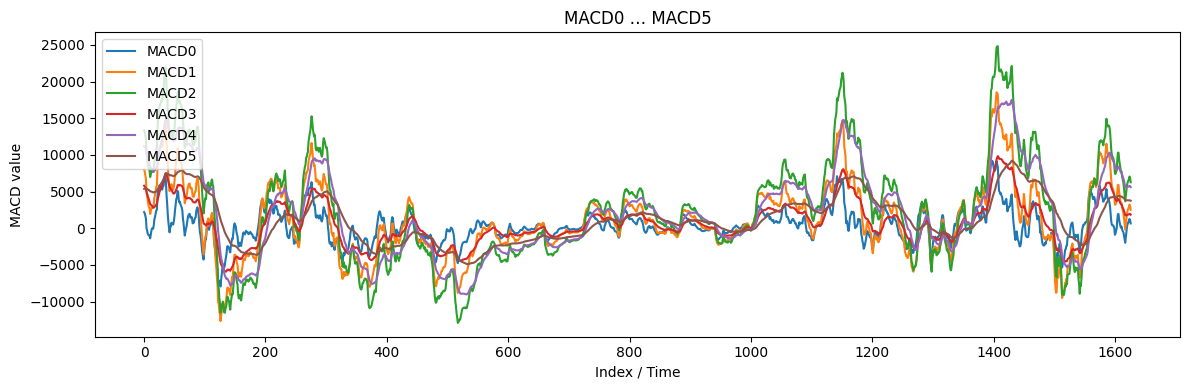

In [ ]:
df = pd.read_csv('BTCUSD.csv')
plot_macd_lags(df)   # df là DataFrame của bạn


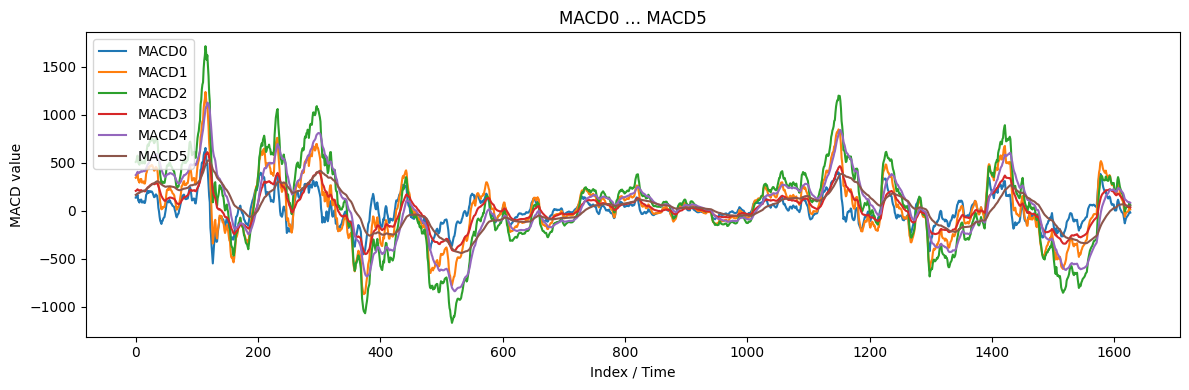

In [28]:
df = pd.read_csv('ETHUSD.csv')
plot_macd_lags(df)   # df là DataFrame của bạn

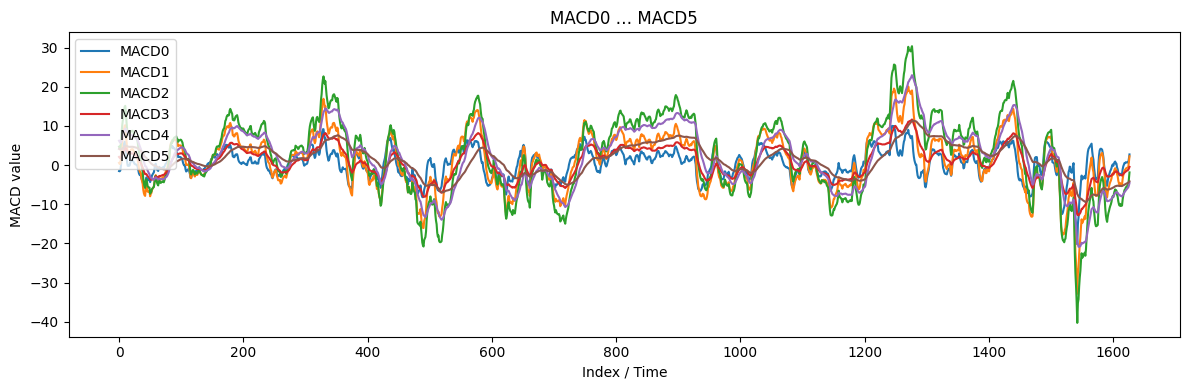

In [31]:
df = pd.read_csv('AAPL.csv')
plot_macd_lags(df)   # df là DataFrame của bạn

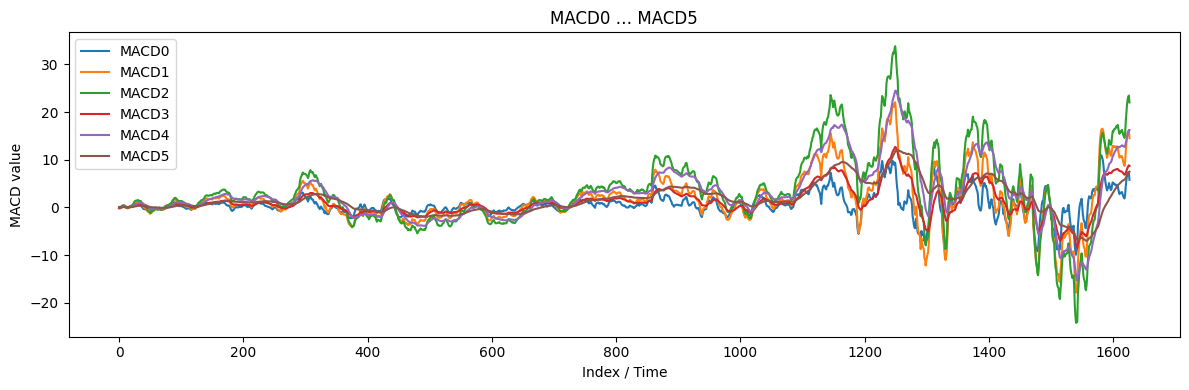

In [35]:
df = pd.read_csv('NVDA.csv')
plot_macd_lags(df)   # df là DataFrame của bạn

In [21]:
def summarize_features(df):
    num = df.select_dtypes(include="number")

    # bảng thống kê gốc
    stats = num.agg(['min', 'max', 'mean', 'std']).T   # :contentReference[oaicite:0]{index=0}

    # thêm cột Avg = (min + max) / 2
    stats['Avg'] = (stats['min'] + stats['max']) / 2   # :contentReference[oaicite:1]{index=1}

    # đổi tên & sắp cột
    stats = (stats.rename(columns={'min': 'Min',
                                   'max': 'Max',
                                   'mean': 'Mean',
                                   'std': 'Std_dev'})
                   [['Min', 'Max', 'Avg', 'Mean', 'Std_dev']])  # :contentReference[oaicite:2]{index=2}

    return stats.round(5)
summary = summarize_features(features_df)
summary.style.format('{:.2f}')



,Min,Max,Avg,Mean,Std_dev
Open,15758.96,111722.54,63740.75,48631.52,24664.64
High,16279.99,112000.00,64140.00,49699.21,25095.06
Low,15460.00,109217.23,62338.61,47499.06,24220.66
Close,15760.14,111722.53,63741.33,48674.43,24703.11
Volume,5331172801.00,350967941479.00,178149557140.00,34851160980.63,22195437283.97
Market Spread,74.18,13591.70,6832.94,2200.15,1723.67
Change,-0.15,0.19,0.02,0.00,0.03
MA(5days),16277.40,109118.87,62698.14,48588.56,24584.31
MA(20days),16533.86,106809.28,61671.57,48268.18,24172.62
MA(50days),16776.59,106075.78,61426.19,47534.73,23339.16


In [22]:
n = len(features_df)
train_end_idx = int(n * 0.7)
val_end_idx = int(n * 0.85)

train_df = features_df.iloc[:train_end_idx]
val_df = features_df.iloc[train_end_idx:val_end_idx]
test_df = features_df.iloc[val_end_idx:]
#start_date and end_date
print("Train :", train_df.index[0], "→", train_df.index[-1])
print("Val   :",  val_df.index[0],  "→", val_df.index[-1])
print("Test  :", test_df.index[0],  "→", test_df.index[-1])


Train : 2021-01-17 00:00:00 → 2024-02-28 00:00:00
Val   : 2024-02-29 00:00:00 → 2024-10-29 00:00:00
Test  : 2024-10-30 00:00:00 → 2025-07-01 00:00:00


In [24]:
print(len(train_df))
print(len(val_df))
print(len(test_df))
print(len(features_df))

1138
244
245
1627
